In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pickle
import MDAnalysis
from MDAnalysis.analysis import rdf
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/gk/bdqkskqj2fv8dk9kgrxm5psh0000gn/T/ipykernel_76314/2540733804.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
def extract_form_log(fn):
    lines=open(fn,'r').readlines()
    start=np.where([('Step' in l) for l in lines])[-1][0]
    data={keyi.lower(): []  for keyi in lines[start].split()}
    for l in lines[start+1:]:
        ls=l.split()
        try:
            if ls[0].isdigit():
                for i, key in enumerate(data.keys()):
                    data[key].append(float(ls[i]))
        
            else:
                break
        except:
            break
    for key in data.keys():
        data[key]=np.array(data[key])
    return data

In [3]:
sims=dict()
for f in glob.glob('*_*/log.lammps'):
    try:
        sims[f.replace('/log.lammps','')]=extract_form_log(f)
    except:
        pass

with open('1-bulk.pickle', 'wb') as handle:
    pickle.dump(sims, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('1-bulk.pickle', 'rb') as handle:
    sims = pickle.load(handle)
print(sims.keys())

dict_keys(['IceV_3500bar', 'Liquid_3500bar', 'Liquid_5000bar', 'IceV_5000bar', 'Liquid_4000bar', 'IceV_7500bar', 'Liquid_8000bar', 'Liquid_7500bar', 'IceV_4000bar', 'IceV_8000bar', 'Liquid_7000bar', 'IceV_7000bar', 'Liquid_6000bar', 'IceV_6000bar'])


### Volume for different pressures

[[3500.         7633.35324007]
 [5000.         7382.40941254]
 [4000.         7538.28249134]
 [8000.         7040.40313574]
 [7500.         7082.68189046]
 [7000.         7135.85189878]
 [6000.         7264.88354351]]


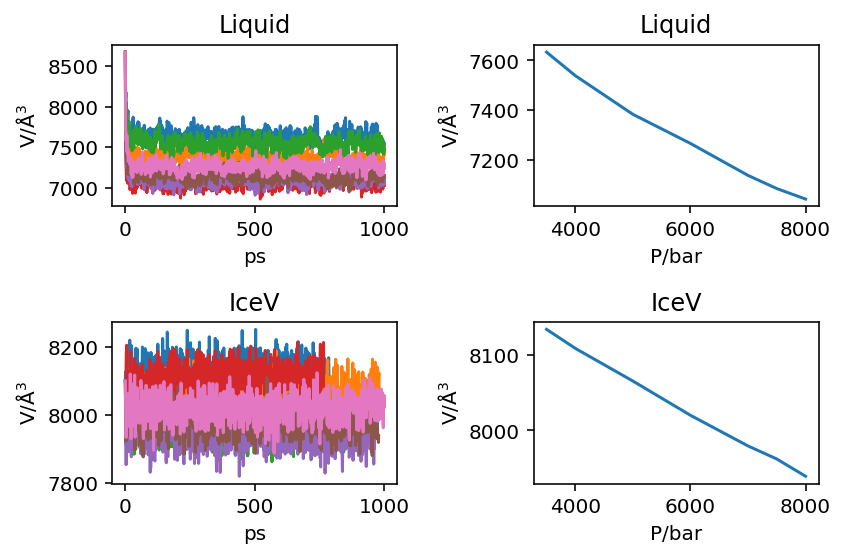

In [4]:
NIGNORE=100
plt.subplot(221)
plt.title('Liquid')
vol_liquid=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceV_','').replace('bar',''))
    if 'Liquid' in key:
        sim=sims[key]
        vol_liquid.append([p,np.mean(sim['volume'][NIGNORE:])])
        plt.plot(sim['step']*2/1000,sim['volume'],label=key)
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')
#plt.xlim([0,100])
plt.subplot(222)
plt.title('Liquid')
vol_liquid=np.array(vol_liquid)
print(vol_liquid)
vol_liquid=vol_liquid[np.argsort(vol_liquid[:,0])]
plt.plot(vol_liquid[:,0],vol_liquid[:,1])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'P/bar')

plt.subplot(223)
plt.title('IceV')
vol_ice=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceV_','').replace('bar',''))
    if 'IceV' in key:
        sim=sims[key]
        vol_ice.append([p,np.mean(sim['volume'][NIGNORE:])])
        plt.plot(sim['step']*2/1000,sim['volume'],label=key)
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')
#plt.xlim([0,100])
plt.subplot(224)
plt.title('IceV')
vol_ice=np.array(vol_ice)
vol_ice=vol_ice[np.argsort(vol_ice[:,0])]
plt.plot(vol_ice[:,0],vol_ice[:,1])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'P/bar')

plt.tight_layout()

### Box sides for different pressures

In [5]:
sim.keys()

dict_keys(['step', 'temp', 'poteng', 'toteng', 'e_pair', 'e_mol', 'press', 'lx', 'ly', 'lz', 'xy', 'xz', 'yz', 'volume', 'pxx', 'pyy', 'pzz', 'pxy', 'pxz', 'pyz'])

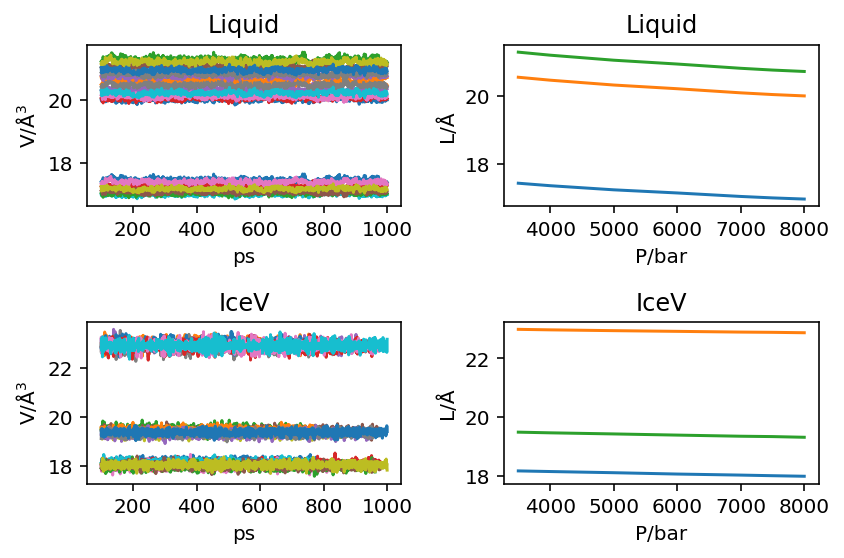

In [6]:
NIGNORE=100
plt.subplot(221)
plt.title('Liquid')
box_liquid=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceV_','').replace('bar',''))
    if 'Liquid' in key:
        sim=sims[key]
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['lx'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['ly'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['lz'][NIGNORE:])

        box_liquid.append([p,np.mean(sim['lx'][NIGNORE:]),
                         np.mean(sim['ly'][NIGNORE:]),
                         np.mean(sim['lz'][NIGNORE:])])
                       
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')

plt.subplot(222)
plt.title('Liquid')
box_liquid=np.array(box_liquid)
box_liquid=box_liquid[np.argsort(box_liquid[:,0])]
plt.plot(box_liquid[:,0],box_liquid[:,1:4])
plt.ylabel(r'L/Å')
plt.xlabel(r'P/bar')


plt.subplot(223)
plt.title('IceV')
box_IceV=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceV_','').replace('bar',''))
    if 'IceV' in key:
        sim=sims[key]
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['lx'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['ly'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['lz'][NIGNORE:])

        box_IceV.append([p,np.mean(sim['lx'][NIGNORE:]),
                         np.mean(sim['ly'][NIGNORE:]),
                         np.mean(sim['lz'][NIGNORE:]),
                         np.mean(sim['xy'][NIGNORE:]),
                         np.mean(sim['xz'][NIGNORE:]),
                         np.mean(sim['yz'][NIGNORE:])])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')

plt.subplot(224)
plt.title('IceV')
box_IceV=np.array(box_IceV)
box_IceV=box_IceV[np.argsort(box_IceV[:,0])]
plt.plot(box_IceV[:,0],box_IceV[:,1:4])
plt.ylabel(r'L/Å')
plt.xlabel(r'P/bar')

plt.tight_layout()


In [7]:
print('Liquid')
for val in box_liquid:
    print('Pressure: ',val[0],'bar, lx:',val[1],'Å, ly:',val[2],'Å, lz:',val[3],'Å')
print()
print('IceIh')
for val in box_IceV:
    print('Pressure: ',val[0],'bar, lx:',val[1],'Å, ly:',val[2],'Å, lz:',val[3],'Å')        

Liquid
Pressure:  3500.0 bar, lx: 17.448094098779134 Å, ly: 20.551550119866814 Å, lz: 21.286634027746945 Å
Pressure:  4000.0 bar, lx: 17.375382015538293 Å, ly: 20.465904904550502 Å, lz: 21.197925500554938 Å
Pressure:  5000.0 bar, lx: 17.254814358490567 Å, ly: 20.32389213873474 Å, lz: 21.05083320532741 Å
Pressure:  6000.0 bar, lx: 17.162775886792453 Å, ly: 20.215482981132073 Å, lz: 20.93854653052164 Å
Pressure:  7000.0 bar, lx: 17.060551395116537 Å, ly: 20.095075992230854 Å, lz: 20.81383281354051 Å
Pressure:  7500.0 bar, lx: 17.01809034628191 Å, ly: 20.045062534961158 Å, lz: 20.76203048945616 Å
Pressure:  8000.0 bar, lx: 16.98416150166482 Å, ly: 20.00509882130966 Å, lz: 20.72063734517203 Å

IceIh
Pressure:  3500.0 bar, lx: 18.158513391872276 Å, ly: 22.99350360812772 Å, lz: 19.48182107402032 Å
Pressure:  4000.0 bar, lx: 18.137041538230886 Å, ly: 22.97636140929535 Å, lz: 19.458915311844077 Å
Pressure:  5000.0 bar, lx: 18.096901046538026 Å, ly: 22.948731178206586 Å, lz: 19.4214344892168 Å


In [8]:
with open('avg_IceV_box.dat','w') as fp_out:
    for val in box_IceV:
        fp_out.write('{:8}{:10.5}{:10.5}{:10.5}{:10.5}{:10.5}{:10.5}\n'.format(val[0],val[1],val[2],val[3],val[4],val[5],val[6]))
!cat avg_IceV_box.dat

  3500.0    18.159    22.994    19.482  -0.13447   -6.6035  0.098937
  4000.0    18.137    22.976    19.459  -0.13161     -6.59  0.097329
  5000.0    18.097    22.949    19.421   -0.1322   -6.5539  0.097439
  6000.0    18.051    22.925    19.381   -0.1362   -6.5299   0.10361
  7000.0    18.015      22.9    19.343  -0.13497   -6.4975   0.10187
  7500.0    17.994    22.892    19.331  -0.13985   -6.4793   0.10833
  8000.0    17.976    22.878    19.307  -0.13502   -6.4644    0.1039


## Plot of radial distributions for all simulations

In [9]:
sims_result=dict()
dr=0.05
start=500

for key in sims.keys():
    sims_result[key]=dict()
    try:
        u = MDAnalysis.Universe(key+"/water.data", key+"/dump.dcd", format="LAMMPS")
    except:
         u = MDAnalysis.Universe(key+"/iceV.data", key+"/dump.dcd", format="LAMMPS")
    u.pbc=True
    atoms=u.select_atoms("type 2")
    RDF=rdf.InterRDF(atoms,atoms,range=(1.-.5*dr,11.+0.5*dr),nbins=1+int(10./dr)).run(start=start)
    sims_result[key]['rdf']=RDF

(0.0, 8.0)

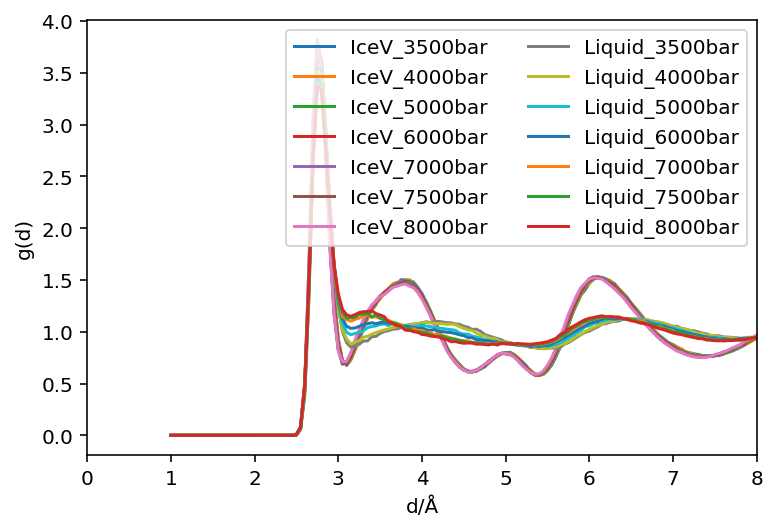

In [10]:
for key in sorted(sims_result.keys()):
    plt.plot(sims_result[key]['rdf'].results.bins,sims_result[key]['rdf'].results.rdf,label=key)
#data=np.loadtxt('rdf_rigid_1atm_300K.dat')
#plt.plot(data[:,0],data[:,1],label='ref 300K')
plt.xlabel('d/Å')
plt.ylabel('g(d)')
plt.legend(ncol=2)
plt.xlim([0,8])